# Analysis on Netflix Movies & TV Shows

This is an Exploratory data analysis on Netflix movies and tv shows. 

Short description about Netflix,
Netflix is an American subscription streaming service and production company. Launched on August 29, 1997, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals. It is the world's leading streaming entertainment service with 222 million paid memberships in over 190 countries enjoying TV series, documentaries,.. etc

## Downloading the Dataset

Initially, we found out the data on kaggle (https://www.kaggle.com/datasets?fileType=csv) and importing the libraries which will be used in further analysis. We passed the url of data into a variable and downloaded it. 
Exclusively, you can find out the data set at https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies.

We can download and upload dataset manually but we are using opendatasets helper library to download file.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

In [3]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies' 

In [4]:
key = feee545895ec36112835b90836fea6f2

NameError: name 'feee545895ec36112835b90836fea6f2' is not defined

In [6]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./netflix-tv-shows-and-movies" (use force=True to force download)


Now the dataset has been downloaded and extracted.

In [7]:
# Change this
data_dir = './netflix-tv-shows-and-movies'

In [8]:
import os
os.listdir(data_dir)

['credits.csv', 'titles.csv']

You can go through the downloaded files. You can find it using File--> Open.
It has, `credits.csv`, `titles.csv` files. 

Let us save and upload our work to Jovian before continuing.

In [9]:
project_name = "netflix-tv-shows-and-movies" 

In [10]:
!pip install jovian --upgrade -q

In [11]:
import jovian

In [12]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siva-muram/netflix-tv-shows-and-movies" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/siva-muram/netflix-tv-shows-and-movies


'https://jovian.ai/siva-muram/netflix-tv-shows-and-movies'

## Data Preparation and Cleaning

Now we are ready to load the dataset. We will do this using the standard `read_csv` command from Pandas.
We will be finding out the number of rows and columns the dataset has, handling the missing values.

In [13]:
import pandas as pd

In [14]:
raw_titles_df = pd.read_csv(data_dir +'/titles.csv')
raw_titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN


we don't require Id, imdb id of a amovie or show we intend to drop them for making the data clear and concise. 

New data set is as follows:

In [15]:
titles_df = raw_titles_df.drop(['id', 'imdb_id'], axis = 1)
titles_df

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,0.600,NaN
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,8.3,795222.0,27.612,8.2
2,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,8.2,530877.0,18.216,7.8
3,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,8.0,392419.0,17.505,7.8
4,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,6.9,39.0,0.966,NaN
5802,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,1.036,8.5
5803,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,6.5,32.0,0.709,NaN
5804,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,6.2,9.0,2.186,NaN


In [16]:
titles_df.shape

(5806, 13)

   `.shape()`
method is used to find number of rows and columns. In this case we have 13 columns and 5806 rows. Here  rows denotes the number releases till date(both movies and shows count). And columns denote various factors considered in the survey.

In [17]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5806 non-null   object 
 2   description           5788 non-null   object 
 3   release_year          5806 non-null   int64  
 4   age_certification     3196 non-null   object 
 5   runtime               5806 non-null   int64  
 6   genres                5806 non-null   object 
 7   production_countries  5806 non-null   object 
 8   seasons               2047 non-null   float64
 9   imdb_score            5283 non-null   float64
 10  imdb_votes            5267 non-null   float64
 11  tmdb_popularity       5712 non-null   float64
 12  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 589.8+ KB


As you can see there are object, float and int type values.

In [18]:
titles_df.columns

Index(['title', 'type', 'description', 'release_year', 'age_certification',
       'runtime', 'genres', 'production_countries', 'seasons', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

Above data is showing about columns(factors they have considered for the survey) in the given dataset. 

In [19]:
titles_df.nunique()

title                   5751
type                       2
description             5785
release_year              67
age_certification         11
runtime                  205
genres                  1626
production_countries     449
seasons                   23
imdb_score                81
imdb_votes              3831
tmdb_popularity         4943
tmdb_score                78
dtype: int64

This tells about the number of unique values each column has.

As you can see 5751 unique titles and but the rows are 5806(there might be some data which entered multiple times).
Only 2 types viz, MOVIES and TV SHOWS were there.
5785 unique descriptions for a movie/ show were entered.. and so on.

In [20]:
titles_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


All values seems to be ok, and we see average run time of a show/movie is around 77 min and number of seasons being 2. With a average imdb score of 6.5 which decent to be watched.

#### Handling null values

Check if there are any null values and handling them with appropriate values.

In [21]:
titles_df.isnull().values.any()

True

In [22]:
titles_df.isnull().sum().sum()

7862

This is the total count of null values in the data set.

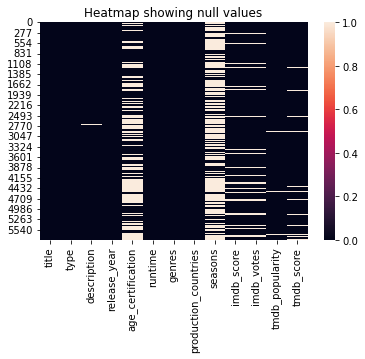

In [23]:
sns.heatmap(titles_df.isnull())
plt.title('Heatmap showing null values');

There a total of 7862 null of values are present in given dataset of which can be seen majorly seen in seasons, age certification, imdb score and imdb votes. 

Null values in each column is given by:

In [24]:
titles_df.isnull().sum()

title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

We are unable to find the exact columns which has null values just by viewing the heatmap, as there some columns which have null values but unable to visualize in heatmap(for e.g., title). It is shown by `isnull().sum()` function unable figure it out by viewing heatmap. Hence it's important to use this function in order find null values instead heatmap. But map gives you a brief overview of how many null values were there for each column. now, Filling the null values with appropriate values

In [25]:
titles_df['seasons'].fillna(0, inplace = True)
titles_df

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,0.600,NaN
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],0.0,8.3,795222.0,27.612,8.2
2,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,8.2,530877.0,18.216,7.8
3,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0.0,8.0,392419.0,17.505,7.8
4,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],0.0,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],0.0,6.9,39.0,0.966,NaN
5802,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],0.0,NaN,NaN,1.036,8.5
5803,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",0.0,6.5,32.0,0.709,NaN
5804,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],0.0,6.2,9.0,2.186,NaN


In [26]:
titles_df['title'].fillna('no title', inplace = True)
titles_df['description'].fillna('no description', inplace = True)
titles_df['age_certification'].fillna(0, inplace = True)
titles_df['imdb_score'].fillna(0, inplace = True)
titles_df['imdb_votes'].fillna(0, inplace = True)
titles_df['tmdb_popularity'].fillna(0, inplace = True)
titles_df['tmdb_score'].fillna(0, inplace = True)

In [27]:
titles_df.isnull().sum()

title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

As we can see there were no null values, we can proceed further.

In [28]:
titles_df

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,0.0,0.0,0.600,0.0
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],0.0,8.3,795222.0,27.612,8.2
2,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,8.2,530877.0,18.216,7.8
3,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0.0,8.0,392419.0,17.505,7.8
4,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],0.0,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,0,100,"['romance', 'drama']",['NG'],0.0,6.9,39.0,0.966,0.0
5802,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,0,74,"['music', 'documentation']",[],0.0,0.0,0.0,1.036,8.5
5803,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,0,88,"['family', 'drama']","['NG', 'CA']",0.0,6.5,32.0,0.709,0.0
5804,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,0,116,"['action', 'thriller']",[],0.0,6.2,9.0,2.186,0.0


## Saving our work

In [29]:
import jovian

In [30]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siva-muram/netflix-tv-shows-and-movies" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/siva-muram/netflix-tv-shows-and-movies


'https://jovian.ai/siva-muram/netflix-tv-shows-and-movies'

## Exploratory Analysis and Visualization

Here we will be analysing the data with appropriate plots. Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some selection bias.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [31]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [32]:
titles_df

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,0.0,0.0,0.600,0.0
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],0.0,8.3,795222.0,27.612,8.2
2,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,8.2,530877.0,18.216,7.8
3,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0.0,8.0,392419.0,17.505,7.8
4,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],0.0,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,0,100,"['romance', 'drama']",['NG'],0.0,6.9,39.0,0.966,0.0
5802,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,0,74,"['music', 'documentation']",[],0.0,0.0,0.0,1.036,8.5
5803,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,0,88,"['family', 'drama']","['NG', 'CA']",0.0,6.5,32.0,0.709,0.0
5804,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,0,116,"['action', 'thriller']",[],0.0,6.2,9.0,2.186,0.0


### Splitting data
Given dataset has both movies and shows together. It will be easy for analysis if data split based on type i.e, movie/show. We can analyze individually for both. Hence, now we are splitting dataset into types, one has info about movies and other has about shows. In particular we are looking for the recently released movies/shows 10 of each

In [34]:
releases_type = titles_df.type.value_counts()
releases_type

MOVIE    3759
SHOW     2047
Name: type, dtype: int64

There are 3759 movies, and 2047 shows. We can see large content is of type movies but shows are also nearly in comparison with that of movies.

In [35]:
release_year_stats = titles_df.release_year.value_counts()
release_year_stats

2019    848
2020    805
2018    774
2021    758
2017    580
       ... 
1974      1
1959      1
1962      1
1978      1
1945      1
Name: release_year, Length: 67, dtype: int64

Highest number of releases were there in the year 2019 which is post pandemic and followed 2020.

For the sake of analysis let us consider a random of 10 of each type movies and shows. 

In [36]:
movies_df = titles_df[titles_df.type == 'MOVIE'].sample(10)
movies_df

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3081,The Lost Café,MOVIE,An uplifting story about a girl's decision to ...,2018,0,76,"['drama', 'comedy']","['NO', 'NG']",0.0,6.4,24.0,1.400,5.0
828,Kyaa Super Kool Hain Hum,MOVIE,An aspiring actor and a struggling DJ team up ...,2012,R,137,"['drama', 'comedy']",['IN'],0.0,5.0,3885.0,3.402,5.1
298,Rambo,MOVIE,When governments fail to act on behalf of capt...,2008,R,92,"['thriller', 'action', 'war', 'european']","['US', 'DE']",0.0,7.0,228799.0,58.435,6.6
3831,Ultras,MOVIE,An aging soccer fanatic faces down the reality...,2020,0,109,['drama'],['IT'],0.0,6.2,4831.0,9.603,6.1
5571,Carolin Kebekus: The Last Christmas Special,MOVIE,"One of the biggest comedians in Germany, Carol...",2021,0,66,['comedy'],[],0.0,4.7,97.0,2.394,5.3
4868,The Lost Daughter,MOVIE,A woman's seaside vacation takes a dark turn w...,2021,R,122,['drama'],"['GB', 'US', 'GR']",0.0,6.7,56650.0,46.069,6.6
3595,Making The Witcher,MOVIE,"Journey into the extraordinary world of ""The W...",2020,PG-13,32,['documentation'],['GB'],0.0,6.8,442.0,20.910,7.7
993,The November Man,MOVIE,An ex-CIA operative is brought back in on a ve...,2014,R,108,"['crime', 'action', 'thriller']","['GB', 'US']",0.0,6.3,67243.0,14.820,6.1
1978,A Futile and Stupid Gesture,MOVIE,The National Lampoon name became globally reco...,2018,0,101,['comedy'],['US'],0.0,6.7,15750.0,12.272,6.5
3015,Son Of Adam,MOVIE,"To escape conviction on criminal charges, a bu...",2018,0,109,['thriller'],['EG'],0.0,0.0,0.0,1.459,6.0


In [37]:
shows_df = titles_df[titles_df.type == 'SHOW'].sample(10)
shows_df

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3131,Pretty Man,SHOW,It tells the love story of Lu Jin Nian and Qia...,2018,TV-14,35,['family'],['CN'],2.0,0.0,0.0,4.429,8.5
134,InuYasha,SHOW,Kagome Higurashi is a modern day young girl wh...,2000,TV-14,25,"['action', 'comedy', 'scifi', 'animation', 'dr...",['JP'],9.0,7.9,15823.0,149.742,8.6
3868,Jinn,SHOW,The lives of a group of teenagers are disrupte...,2019,TV-14,32,"['scifi', 'drama', 'fantasy', 'horror', 'thril...",['JO'],1.0,3.5,10043.0,6.461,6.5
2832,Wrong Kind of Black,SHOW,From the crocs and cops of 1960s Queensland to...,2018,TV-MA,16,"['comedy', 'drama']",['AU'],1.0,7.7,148.0,1.033,7.5
5016,Midnight at the Pera Palace,SHOW,"At a historic Istanbul hotel, a journalist is ...",2022,TV-14,44,"['crime', 'drama', 'history']",['TR'],1.0,7.1,6624.0,6.780,7.2
5127,Bulgasal: Immortal Souls,SHOW,The story of a woman who has gone through seve...,2021,TV-MA,71,"['scifi', 'thriller', 'drama', 'fantasy']",['KR'],1.0,7.4,1897.0,41.943,8.1
3490,The Chef Show,SHOW,"Writer, director and food enthusiast Jon Favre...",2019,TV-MA,26,['documentation'],['US'],2.0,8.2,5025.0,14.612,7.8
5320,Elite Short Stories: Omar Ander Alexis,SHOW,"Now in remission, Ander is set on spending his...",2021,TV-MA,12,"['drama', 'crime', 'thriller']",['ES'],1.0,7.3,1903.0,30.602,7.7
5261,Aranyak,SHOW,After a foreign teenage tourist goes missing i...,2021,TV-MA,41,"['crime', 'thriller', 'drama']",['IN'],1.0,7.9,7629.0,5.317,7.7
2129,Sisters,SHOW,Sisters follows the story of three women who d...,2017,TV-14,36,"['drama', 'comedy']",['AU'],1.0,7.5,1729.0,2.170,8.6


We have another interesting topic to look for which is genre.

here is the list of genres available in the given dataset of MOVIES.

In [43]:
genre_df = movies_df.genres.unique()
genre_df

array(["['drama', 'comedy']", "['thriller', 'action', 'war', 'european']",
       "['drama']", "['comedy']", "['documentation']",
       "['crime', 'action', 'thriller']", "['thriller']"], dtype=object)

we will see a SCATTERPLOT on runtime vs imdb score for a movie

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


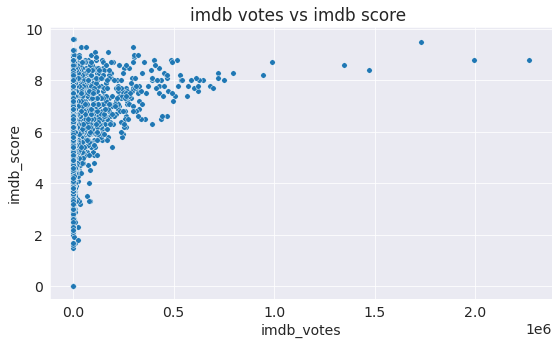

In [86]:
sns.scatterplot(titles_df.imdb_votes, titles_df.imdb_score, s =30)
plt.title('imdb votes vs imdb score ');

It is seen that mostly imdb score is given by the less people(i.e, less votes were polled) for Imdb score of range 5 to 9 is mostly given by less than 200000 people.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


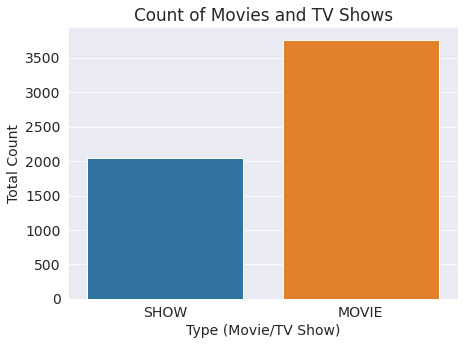

In [73]:
plt.figure(figsize=(7,5))
g = sns.countplot(titles_df.type);
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

From the above graph, we can see that netflix is preferring a movie over a show(these were of recently released, 10 of each type). There were around 3700 movies while shows being 2100.
This can be due to people are preferring movies than shows as shows can last for hours(in case if it has seasons) but movie run time is almost fixed(which will be around 2 to 3 hrs). 

We will also be looking at the piechart but with same data as above plot.

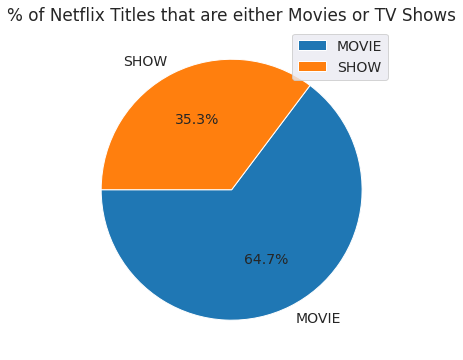

In [74]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
plt.pie(titles_df.type.value_counts(), labels=titles_df.type.value_counts().index, autopct='%1.1f%%', startangle=180);
plt.legend();

In [84]:
Imdb_ratings_df = movies_df.imdb_score
Tmdb_ratings_df = movies_df.tmdb_score


Ratings seems to be ok. There were films with a good rating and bad ratings as well. Mostly there are of decent rating.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


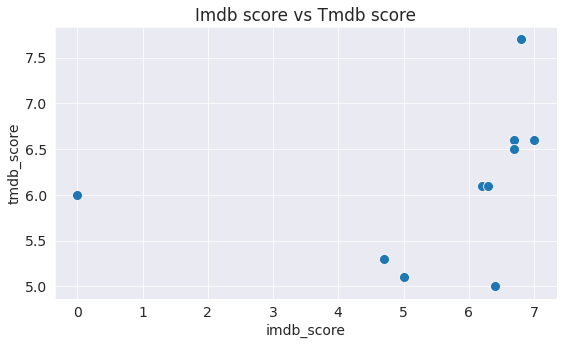

In [90]:
sns.scatterplot(Imdb_ratings_df, Tmdb_ratings_df, s=100)
plt.title('Imdb score vs Tmdb score');

Recently released 100 movies and shows ratings

In [92]:
recent_releases = titles_df.tail(100)
recent_releases.groupby('type')[['runtime','seasons','imdb_score', 'tmdb_score']].mean()

,runtime,seasons,imdb_score,tmdb_score
type,,,,
MOVIE,92.256757,0.000000,4.306757,5.274324
SHOW,32.576923,1.038462,4.084615,5.253846


We can see a decent rating for both the types(movies and tv shows). Average run time of movies is 92 min while that of a show being 32 min.

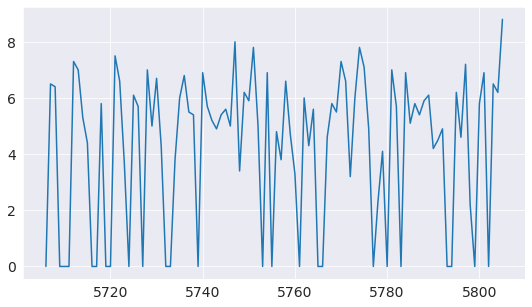

In [106]:
plt.plot(recent_releases.imdb_score);

In [108]:
releases_in_2021 = titles_df[titles_df.release_year == 2021][['type','seasons','runtime','imdb_score', 'tmdb_score']]
top_Imdbrated_releases_in_2021 = releases_in_2021.sort_values('imdb_score', ascending = False).head(20)
top_Imdbrated_releases_in_2021

,type,seasons,runtime,imdb_score,tmdb_score
4847,SHOW,1.0,41,9.1,9.1
5805,SHOW,1.0,0,8.8,10.0
5459,SHOW,1.0,64,8.8,8.5
5215,SHOW,1.0,19,8.7,8.4
4944,MOVIE,0.0,87,8.7,8.3
5242,SHOW,1.0,52,8.6,7.8
5512,MOVIE,0.0,84,8.6,0.0
5042,SHOW,1.0,78,8.5,8.2
5271,SHOW,1.0,22,8.4,7.8
5152,SHOW,1.0,44,8.4,9.4


In [109]:
titles_df.at[4847, 'title']

'Arcane'

In [110]:
titles_df.at[4847,'release_year']

2021

We can see Shows are the most rated ones than movies when compared with the recent 20 releases in 2021 from the dataset. And the show called ARCANE has best imdb score (i.e., 9.1) and it is released in the year 2021.

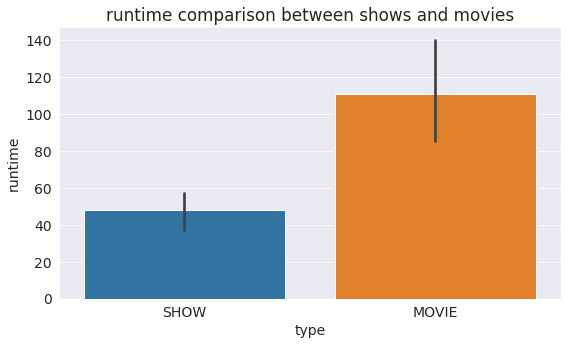

In [111]:
sns.barplot(x= 'type', y = 'runtime', data= top_rated_releases_in_2021)
plt.title('runtime comparison between shows and movies');

From above barplot we can say recent released movies has more run time than shows released.

Let us save and upload our work to Jovian before continuing

In [112]:
import jovian

In [113]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siva-muram/netflix-tv-shows-and-movies" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/siva-muram/netflix-tv-shows-and-movies


'https://jovian.ai/siva-muram/netflix-tv-shows-and-movies'

## Asking and Answering Questions

In this section, we will be going through some questions followed by the explanation.



#### Q1:  which year has most releases?(irrespective of type, it type can be either of show or a movie)

for this question, we need to find out the maximum number of movies/shows in particular year.

In [114]:
titles_year = titles_df['release_year'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
titles_year.sort_values('release_year', ascending = False)

,year,release_year
0,2019,848
1,2020,805
2,2018,774
3,2021,758
4,2017,580
...,...,...
55,1963,1
54,1961,1
53,1967,1
52,1964,1


Code explanation, First, we added up the number releases made per year and then we sorted it in order to get max releases in a year.

Analysis on output, we can see that most number of releases were seen in the year 2019(848 releases), followed by 2020 which is followed by 2018, and etc. 

In [115]:
netflix_year2 = titles_df[['type','release_year']]
movie_year = netflix_year2[netflix_year2['type']=='MOVIE'].release_year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year >2008 ]
show_year = netflix_year2[netflix_year2['type']=='SHOW'].release_year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year >2008 ]

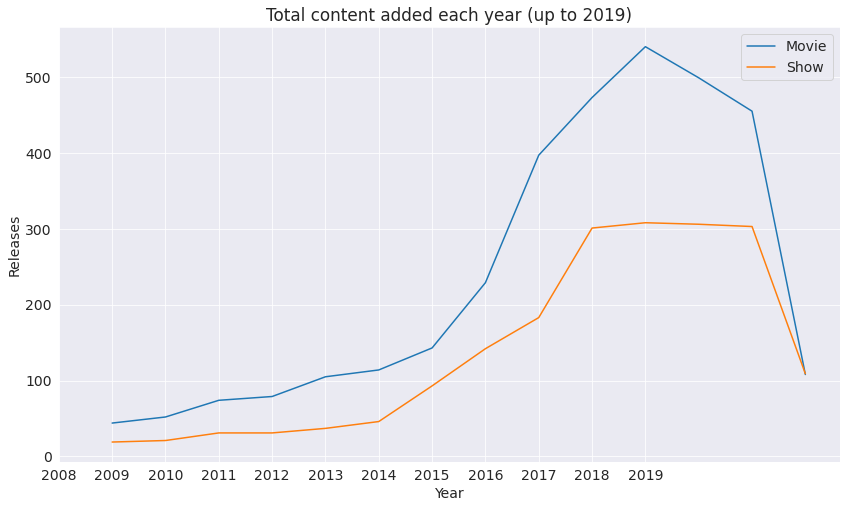

In [116]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(data=movie_year, x='year', y='release_year')
sns.lineplot(data=show_year, x='year', y='release_year')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Movie','Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

We can content being added in netflix is being increased rapidly from year 2008 to 2018. And later in 2019, there huge decrese in the releases made by netflix. The reason could be the lack of content. Due to pandemic there might be no production of new content, hence the number of releases has decreased by huge number.

#### Q2: What is the most popular show and most popular movie? 

We need to split data based on type as we were asked most populus movie and show. And then sorting based on imdb score. Here we took imdb score as base to confirm whether a movie/show is popular or not. 

In [117]:
populus_movies = titles_df[titles_df.type == 'MOVIE'][['release_year', 'title', 'imdb_score']]

In [118]:
populus_movies_sorted = populus_movies.sort_values('imdb_score', ascending = False)[['release_year', 'title', 'imdb_score']]
populus_movies_sorted

,release_year,title,imdb_score
876,2011,Chhota Bheem & Krishna in Mayanagari,9.0
2814,2018,C/o Kancharapalem,9.0
25,1979,No Longer Kids,9.0
3352,2020,David Attenborough: A Life on Our Planet,9.0
108,1994,Forrest Gump,8.8
...,...,...,...
3427,2020,Showtime 1958,0.0
4760,2020,Rudra: Secret of the Black Moon,0.0
4761,2019,Ratones Paranoicos: The Band That Rocked Argen...,0.0
4762,2019,The American Game,0.0


Most popular movie is chhota bheem&krishna in mayanagri, C/o Kancharapalem, No Longer Kids, David Attenborough: A Life on Our Planet with imdb score as 9.0 and released in years 2011, 2018, 1979, 2020 respectively.

In [119]:
populus_show = titles_df[titles_df.type == 'SHOW'][['release_year', 'title', 'imdb_score']].sort_values('imdb_score', ascending = False)[['release_year', 'title', 'imdb_score']]
populus_show

,release_year,title,imdb_score
656,2005,Khawatir,9.6
2927,2018,#ABtalks,9.6
243,2008,Breaking Bad,9.5
3320,2019,Our Planet,9.3
259,2005,Avatar: The Last Airbender,9.3
...,...,...,...
4053,2019,Yanxi Palace: Princess Adventures,0.0
4052,2019,Baewatch: Parental Guidance,0.0
4043,2020,Spectros,0.0
4030,2020,The Search,0.0


Most popular show is Khawatir, #ABtalks	 with imdb score as 9.6 and released in the year 2005 and 2018 respectively.

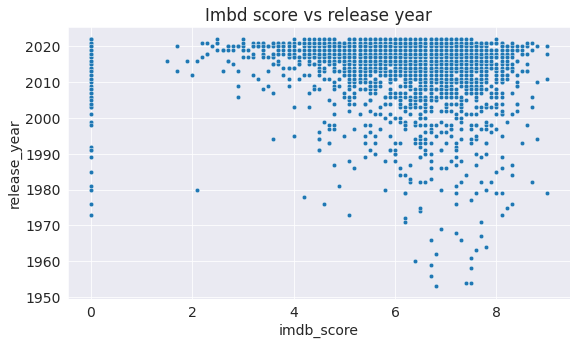

In [121]:
sns.scatterplot(x = 'imdb_score', y = 'release_year', data = populus_movies_sorted, s = 20)
plt.title('Imbd score vs release year');

#### Q3: Comment on runtime of a movie and a show in netflix? 

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


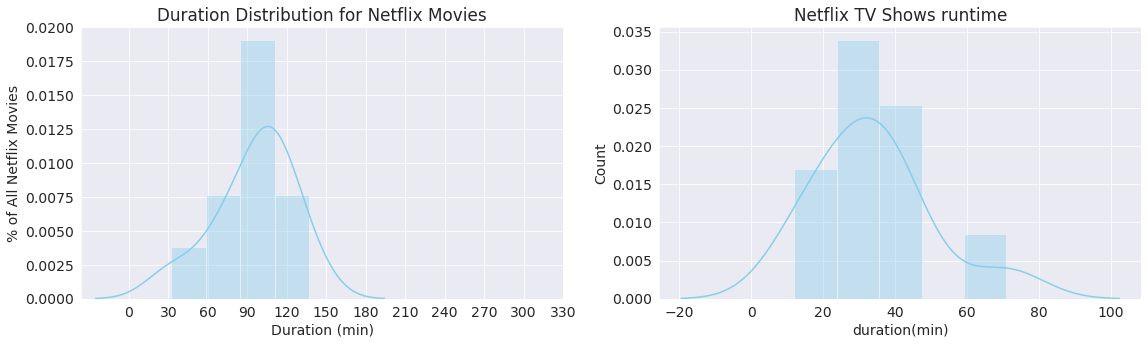

In [126]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.distplot(movies_df.runtime, color='skyblue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (min)")
g2 = sns.distplot(shows_df.runtime, color='skyblue',ax=ax[1]);
g1.set_xticks(np.arange(0,360,30))
g2.set_title("Netflix TV Shows runtime")
g2.set_ylabel("Count")
g2.set_xlabel("duration(min)")
fig.show();

Now we will look into the duration of Netflix films. We had split the dataset between movies and TV shows. Above on the left, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense. Netflix shows have average viewing time as around 30 min. It can be due to shows are of generally multiple episodes and each episode might last for 30 min which is decent runtime.  

#### Q4: comment on age certification of movie and shows?

In [127]:
order = titles_df.age_certification.unique()
order

array(['TV-MA', 'R', 'PG', 'TV-14', 'G', 'PG-13', 0, 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


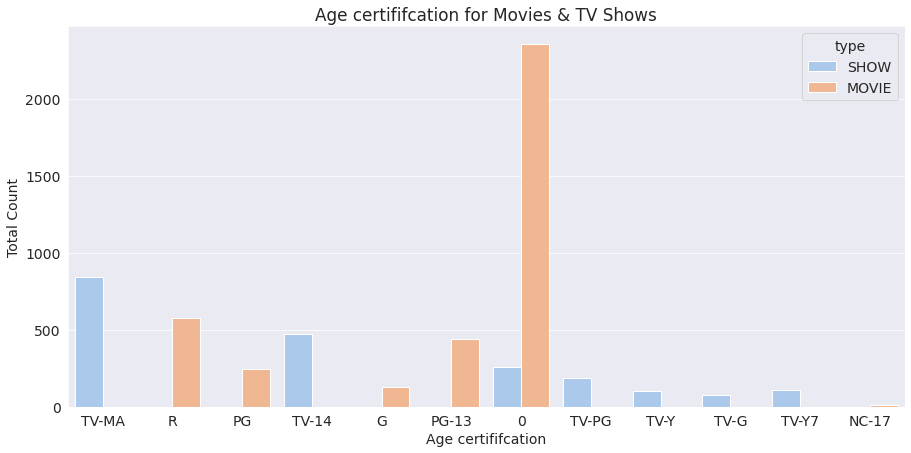

In [128]:
plt.figure(figsize=(15,7))
g = sns.countplot(titles_df.age_certification, hue= titles_df.type, order=order, palette="pastel");
plt.title("Age certififcation for Movies & TV Shows")
plt.xlabel("Age certififcation")
plt.ylabel("Total Count")
plt.show();

In [158]:
movies_df1 = titles_df[titles_df.type == 'MOVIE']
shows_df1 = titles_df[titles_df.type == 'SHOW']

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


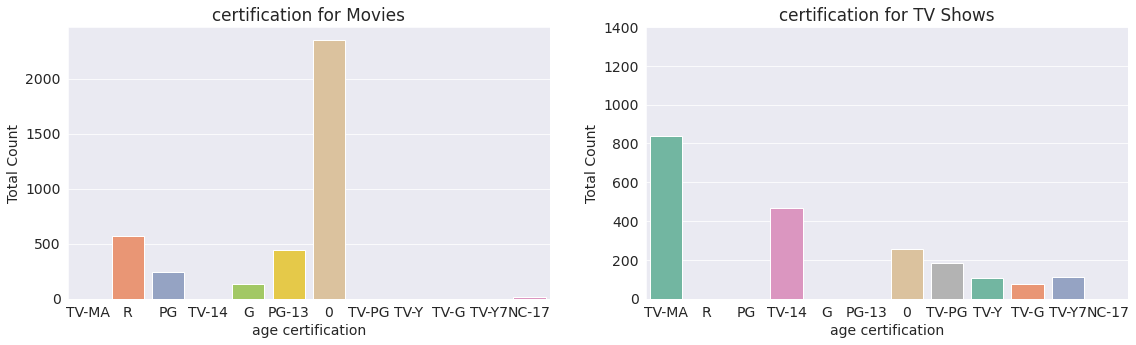

In [163]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(movies_df1.age_certification, order=order,palette="Set2", ax=ax[0]);
g1.set_title("certification for Movies")
g1.set_xlabel("age certification")
g1.set_ylabel("Total Count")
g2 = sns.countplot(shows_df1.age_certification, order=order,palette="Set2", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("certification for TV Shows")
g2.set_xlabel("age certification")
g2.set_ylabel("Total Count")
fig.show();

The above plots shows the comparison between age certification on movies and shows together(in same plot) and separtely(in two different plots).

Initially we have considered no age certification as 0 hence we can see large number over there. We can see a larger count for  movies released by Neflix has no age certification. While it is not same with shows as there are some shows which require it. 

#### Q5: Which film has most tmdb popularity and imdb rating?

In [204]:
netflix_df = titles_df[titles_df.type=='MOVIE'].sort_values('imdb_score', ascending = False)
netflix_df

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
876,Chhota Bheem & Krishna in Mayanagari,MOVIE,Bheem and his Friends are having a great time ...,2011,G,66,"['animation', 'action', 'fantasy']",['IN'],0.0,9.0,5.0,0.963,5.1
2814,C/o Kancharapalem,MOVIE,From a schoolboy’s crush to a middle-aged bach...,2018,PG,152,['drama'],['IN'],0.0,9.0,6562.0,2.096,7.6
25,No Longer Kids,MOVIE,"By coincidence, Ahmad discovers that his fathe...",1979,0,235,"['comedy', 'drama']",['EG'],0.0,9.0,943.0,2.733,7.7
3352,David Attenborough: A Life on Our Planet,MOVIE,The story of life on our planet by the man who...,2020,PG,83,['documentation'],['GB'],0.0,9.0,31180.0,14.834,8.5
108,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,"['drama', 'romance', 'comedy']",['US'],0.0,8.8,1994599.0,57.114,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,Showtime 1958,MOVIE,The true story behind the iconic Selamat Hari ...,2020,0,109,['drama'],['MY'],0.0,0.0,0.0,3.438,0.0
4760,Rudra: Secret of the Black Moon,MOVIE,Kid magician Rudra sets out to save Earth from...,2020,0,87,[],[],0.0,0.0,0.0,0.600,0.0
4761,Ratones Paranoicos: The Band That Rocked Argen...,MOVIE,"The irrepressible Ratones Paranoicos, Argentin...",2019,0,76,"['documentation', 'music']",['AR'],0.0,0.0,0.0,2.059,0.0
4762,The American Game,MOVIE,"In a mold of romantic comedy, a young man and ...",2019,0,92,['comedy'],['EG'],0.0,0.0,0.0,0.988,5.0


Text(0.5, 1.0, 'Imdb score vs Tmdb popularity of movie and shows')

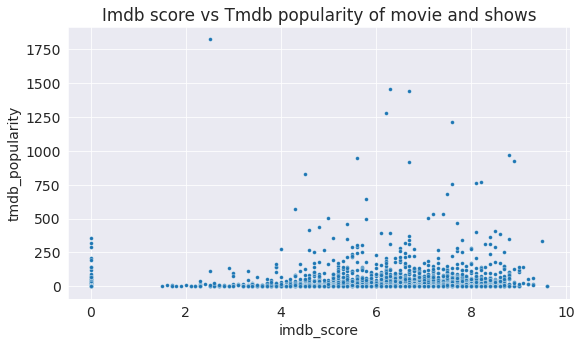

In [130]:
sns.scatterplot(x = titles_df.imdb_score, y = titles_df.tmdb_popularity, s =15);
plt.title('Imdb score vs Tmdb popularity of movie and shows')

In [135]:
movies_df

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3081,The Lost Café,MOVIE,An uplifting story about a girl's decision to ...,2018,0,76,"['drama', 'comedy']","['NO', 'NG']",0.0,6.4,24.0,1.400,5.0
828,Kyaa Super Kool Hain Hum,MOVIE,An aspiring actor and a struggling DJ team up ...,2012,R,137,"['drama', 'comedy']",['IN'],0.0,5.0,3885.0,3.402,5.1
298,Rambo,MOVIE,When governments fail to act on behalf of capt...,2008,R,92,"['thriller', 'action', 'war', 'european']","['US', 'DE']",0.0,7.0,228799.0,58.435,6.6
3831,Ultras,MOVIE,An aging soccer fanatic faces down the reality...,2020,0,109,['drama'],['IT'],0.0,6.2,4831.0,9.603,6.1
5571,Carolin Kebekus: The Last Christmas Special,MOVIE,"One of the biggest comedians in Germany, Carol...",2021,0,66,['comedy'],[],0.0,4.7,97.0,2.394,5.3
4868,The Lost Daughter,MOVIE,A woman's seaside vacation takes a dark turn w...,2021,R,122,['drama'],"['GB', 'US', 'GR']",0.0,6.7,56650.0,46.069,6.6
3595,Making The Witcher,MOVIE,"Journey into the extraordinary world of ""The W...",2020,PG-13,32,['documentation'],['GB'],0.0,6.8,442.0,20.910,7.7
993,The November Man,MOVIE,An ex-CIA operative is brought back in on a ve...,2014,R,108,"['crime', 'action', 'thriller']","['GB', 'US']",0.0,6.3,67243.0,14.820,6.1
1978,A Futile and Stupid Gesture,MOVIE,The National Lampoon name became globally reco...,2018,0,101,['comedy'],['US'],0.0,6.7,15750.0,12.272,6.5
3015,Son Of Adam,MOVIE,"To escape conviction on criminal charges, a bu...",2018,0,109,['thriller'],['EG'],0.0,0.0,0.0,1.459,6.0


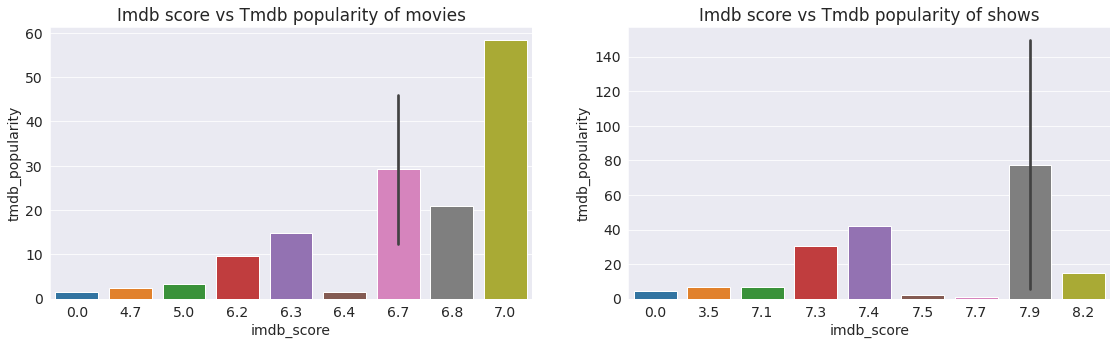

In [141]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
p1 = sns.barplot(x = movies_df.imdb_score, y = movies_df.tmdb_popularity, ax = ax[0]);
p1.set_title('Imdb score vs Tmdb popularity of movies')
p2 = sns.barplot(x = shows_df.imdb_score, y = shows_df.tmdb_popularity, ax= ax[1]);
p2.set_title('Imdb score vs Tmdb popularity of shows')
fig.show();

We can see a large crowd from the imdb score of 6 to 8 and tmdb popularity being around 0 to 100. There are films with both both values as high but they are very few in number as it can be seen from the plot. We can say that imdb score has nothing to do with tmdb popularity viz, there is no proper relation between as it is true for the most of the cases.

Below figure showing individual plot of movies and shows. 

Let us save and upload our work to Jovian before continuing.

In [142]:
import jovian

In [143]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siva-muram/netflix-tv-shows-and-movies" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/siva-muram/netflix-tv-shows-and-movies


'https://jovian.ai/siva-muram/netflix-tv-shows-and-movies'

## Inferences and Conclusion

It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Netflix had about 158 million subscribers worldwide with 60 million from the US and almost 98 million internationally. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion. More over there is continues repetition of genres and people are happy with that, as there are many variations shown even with the most common genre. 

In [147]:
import jovian

In [148]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siva-muram/netflix-tv-shows-and-movies" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/siva-muram/netflix-tv-shows-and-movies


'https://jovian.ai/siva-muram/netflix-tv-shows-and-movies'

## References and future works:

 1)https://www.kaggle.com/shivamb/netflix-shows
 
 2)https://www.geeksforgeeks.org/python-programming-language/
 
 3)https://en.wikipedia.org/wiki/Netflix
 
 4)Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
 
 5)Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

 6)Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
 
 7)Anlysing based ont 

In [208]:
import jovian

In [209]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siva-muram/netflix-tv-shows-and-movies" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/siva-muram/netflix-tv-shows-and-movies


'https://jovian.ai/siva-muram/netflix-tv-shows-and-movies'